## Importing Dataset and libraries

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
df=pd.read_csv(r'D:\ML projects\udemy_courses.csv')
df=df.drop_duplicates()
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


In [146]:
df['date']=pd.to_datetime(df.published_timestamp).dt.date
df['month_p']=pd.DatetimeIndex(df.date).month
df['year_p']=pd.DatetimeIndex(df.date).year
df.head(2)


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date,month_p,year_p
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017-01-18,1,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017-03-09,3,2017


## Exploring data

In [147]:
df.shape

(3672, 15)

In [148]:
df.course_id=df.course_id.astype('category')
df.month_p=df.month_p.astype('category')
df.year_p=df.year_p.astype('category')

In [149]:
df.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,66.102941,3190.586874,156.371460,40.140251,4.097603
std,61.035920,9488.105448,936.178649,50.417102,6.057830
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.750000,4.000000,15.000000,1.000000
50%,45.000000,912.000000,18.000000,25.000000,2.000000
75%,95.000000,2548.750000,67.000000,46.000000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [150]:
df.info()  #implies no null object is present in data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3677
Data columns (total 15 columns):
course_id              3672 non-null category
course_title           3672 non-null object
url                    3672 non-null object
is_paid                3672 non-null bool
price                  3672 non-null int64
num_subscribers        3672 non-null int64
num_reviews            3672 non-null int64
num_lectures           3672 non-null int64
level                  3672 non-null object
content_duration       3672 non-null float64
published_timestamp    3672 non-null object
subject                3672 non-null object
date                   3672 non-null object
month_p                3672 non-null category
year_p                 3672 non-null category
dtypes: bool(1), category(3), float64(1), int64(4), object(6)
memory usage: 551.6+ KB


In [151]:
df.level.value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

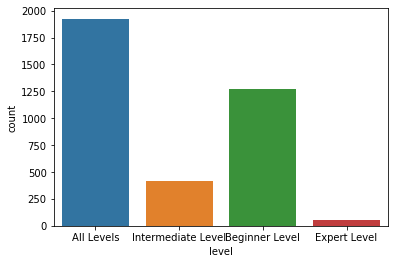

In [152]:
sns.countplot(df.level)

In [153]:
df.subject.value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

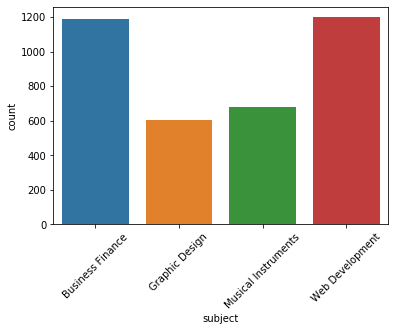

In [154]:
sns.countplot(df.subject)
plt.xticks(rotation=45)

In [155]:
rr=pd.crosstab(df.level,df.subject)
rr

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
level,,,,
All Levels,693,298,276,658
Beginner Level,339,242,296,391
Expert Level,31,5,7,15
Intermediate Level,128,57,101,135


In [156]:
##business Finance and Web development courses are the most preferred ones for all levels.

In [157]:
df[df.price==0].shape

(310, 15)

In [158]:
dff=df.drop(df[['level','subject']],axis=1)


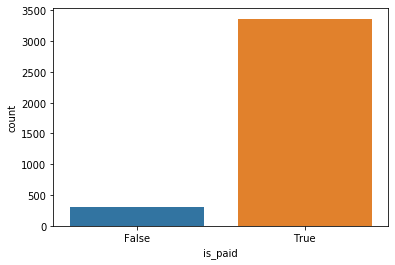

In [159]:
sns.countplot(df.is_paid)

In [160]:
df.month_p.value_counts()

5     375
3     364
4     355
6     349
2     339
11    298
1     292
10    286
7     277
8     254
12    244
9     239
Name: month_p, dtype: int64

In [162]:
df.year_p.value_counts()

2016    1204
2015    1014
2017     713
2014     490
2013     201
2012      45
2011       5
Name: year_p, dtype: int64

Text(0.5, 1.0, 'Published Year')

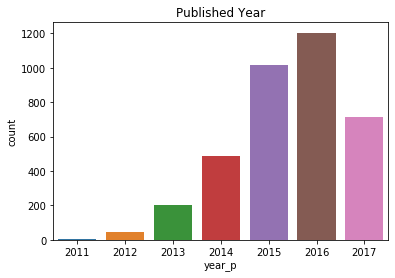

In [176]:
sns.countplot(df.year_p).set_title('Published Year')

In [ ]:
##Max courses were published in 2016 followed by 2015. Courses published decreased for 2017

Text(0.5, 1.0, 'Published month')

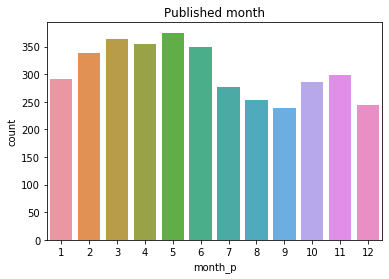

In [177]:
sns.countplot(df.month_p).set_title('Published month')

In [ ]:
##Max courses are published in the month of May

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

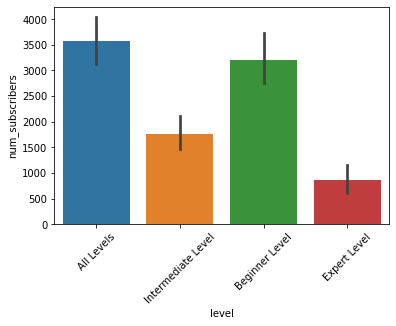

In [165]:
sns.barplot(x=df.level,y=df.num_subscribers)
plt.xticks(rotation=45)

In [166]:
## Most of the people prefer all level or beginner level courses

In [169]:
x=pd.crosstab(df.subject,df.is_paid)
x.apply(lambda x:x/x.sum(),axis=1)

is_paid,False,True
subject,,
Business Finance,0.080605,0.919395
Graphic Design,0.058140,0.941860
Musical Instruments,0.067647,0.932353
Web Development,0.110926,0.889074


In [175]:
df.groupby('is_paid').content_duration.mean()

is_paid
False    2.210753
True     4.271584
Name: content_duration, dtype: float64

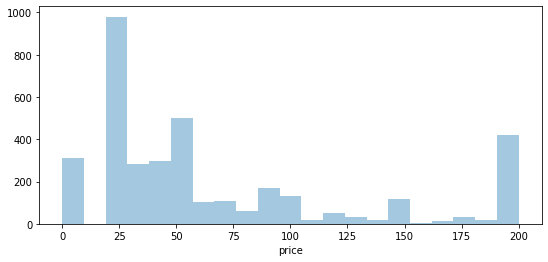

In [182]:
plt.figure(figsize = (9,4))
sns.distplot(df.price, kde = False)
plt.show()

In [183]:
df.num_reviews.describe()

count     3672.000000
mean       156.371460
std        936.178649
min          0.000000
25%          4.000000
50%         18.000000
75%         67.000000
max      27445.000000
Name: num_reviews, dtype: float64

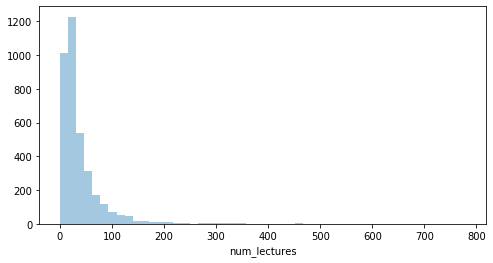

In [185]:
plt.figure(figsize = (8,4))
sns.distplot(df.num_lectures, kde = False)
plt.show()

In [187]:
df.nlargest(5, 'num_subscribers')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date,month_p,year_p
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development,2013-02-14,2,2013
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09T15:51:55Z,Web Development,2013-06-09,6,2013
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development,2015-11-02,11,2015
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08T16:21:30Z,Web Development,2014-04-08,4,2014
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08T22:28:36Z,Web Development,2016-03-08,3,2016


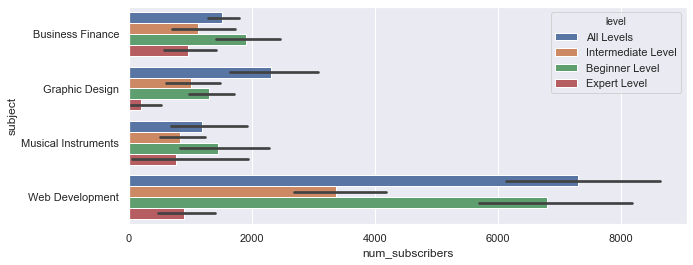

In [235]:
plt.figure(figsize=(10,4))
#sns.barplot(data=df ,x='num_subscribers',y='subject',hue='level',dodge=True)
sns.barplot(data = df, x = 'num_subscribers', y = 'subject',hue='level')

plt.show()

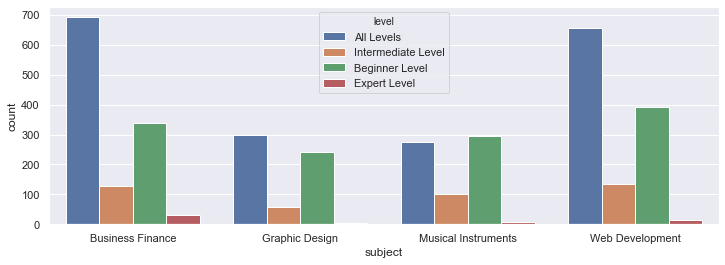

In [242]:
plt.figure(figsize = (12,4))
sns.countplot(data = df, x = 'subject', hue = 'level')
plt.show()

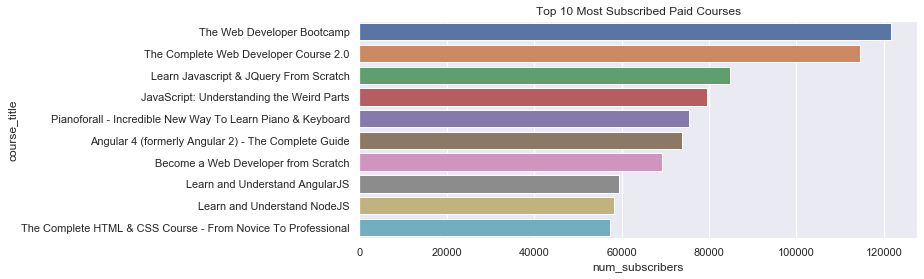

In [238]:
rr=df[df['is_paid'] == True].nlargest(10, 'num_subscribers')
plt.figure(figsize = (10, 4))
sns.barplot(data = rr, 
            x = 'num_subscribers', y = 'course_title')
plt.title(label = "Top 10 Most Subscribed Paid Courses")
plt.show()

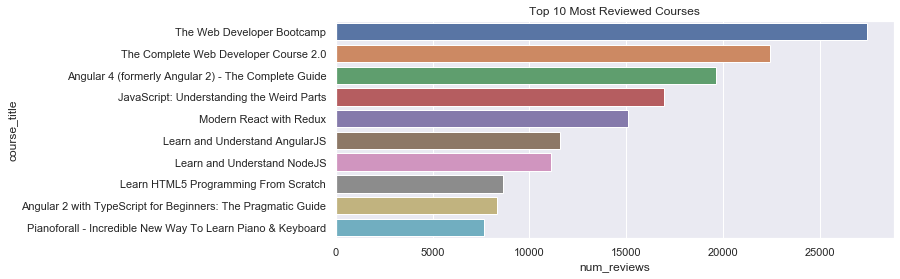

In [240]:
plt.figure(figsize = (10, 4))
sns.barplot(data = df.nlargest(10, 'num_reviews'), 
            x = 'num_reviews', y = 'course_title')
plt.title(label = "Top 10 Most Reviewed Courses")
plt.show()

In [ ]:
## Web Development courses are the most famous courses with highest number of subscribers

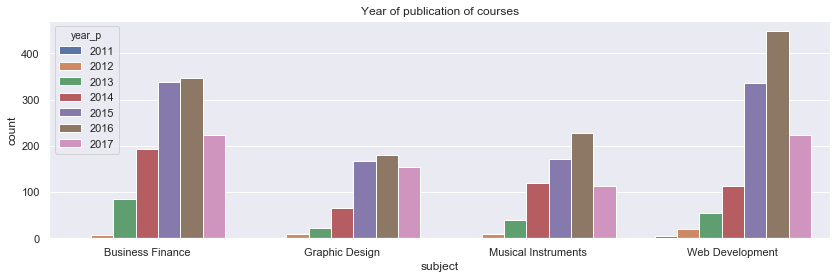

In [246]:
plt.figure(figsize = (14,4))
sns.countplot(data =df, x = 'subject', hue = 'year_p').set_title('Year of publication of courses')
plt.show()

In [170]:
df.corr()

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,1.000000,0.328910,-0.267056,-0.087445,0.112788,0.094594
price,0.328910,1.000000,0.050436,0.113568,0.329944,0.293200
num_subscribers,-0.267056,0.050436,1.000000,0.651070,0.158351,0.162118
num_reviews,-0.087445,0.113568,0.651070,1.000000,0.243019,0.228852
num_lectures,0.112788,0.329944,0.158351,0.243019,1.000000,0.801624
content_duration,0.094594,0.293200,0.162118,0.228852,0.801624,1.000000


In [ ]:
##negative correlation between is_paid and num_subscribers,reviews

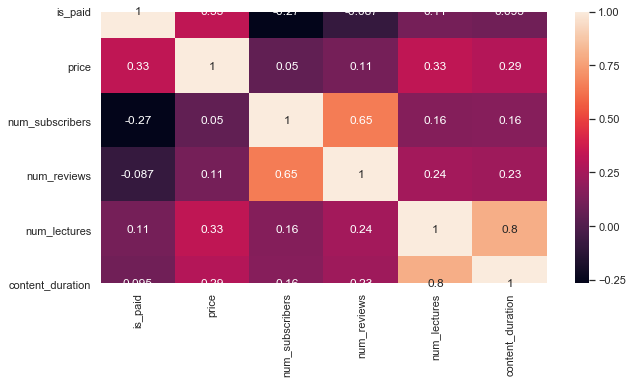

In [252]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [ ]:
## ROUGH WORK HAI ISKE BAAD

In [ ]:
# # Paid/Free Courses: All the unsubscribed courses are paid. 97.6% of unreviewed courses are paid.
# # Difficulty Level: Both unsubscribed and unreviewed courses have beginner courses in the majority 
# (50.7% and 43.05% respectively). 40.3% of all unreviewed courses have all the difficulty levels. 
# The unsubscribed courses have no expert level courses.
# # Subject: There are no Web Development courses that have 0 subscribers. 
# Business Finance courses are the majority in both cases (56.5% for unsubscribed and 39.9% for unreviewed). 
# There are an equal amount of unreviewed Musical Instruments and Graphic Design courses - 
# each constitutes 29.2% of all unreviewed courses.
# # Published Year: In both cases, 2017 is the majority (69.6% for unsubscribed and 47.9% for unreviewed). 
# A possible reason could be because users might not have come across the newer courses.
# There are no unsubscribed and unreviewed courses in 2011. There are no unsubscribed courses in 2011, 2012, 2013 and 2015.

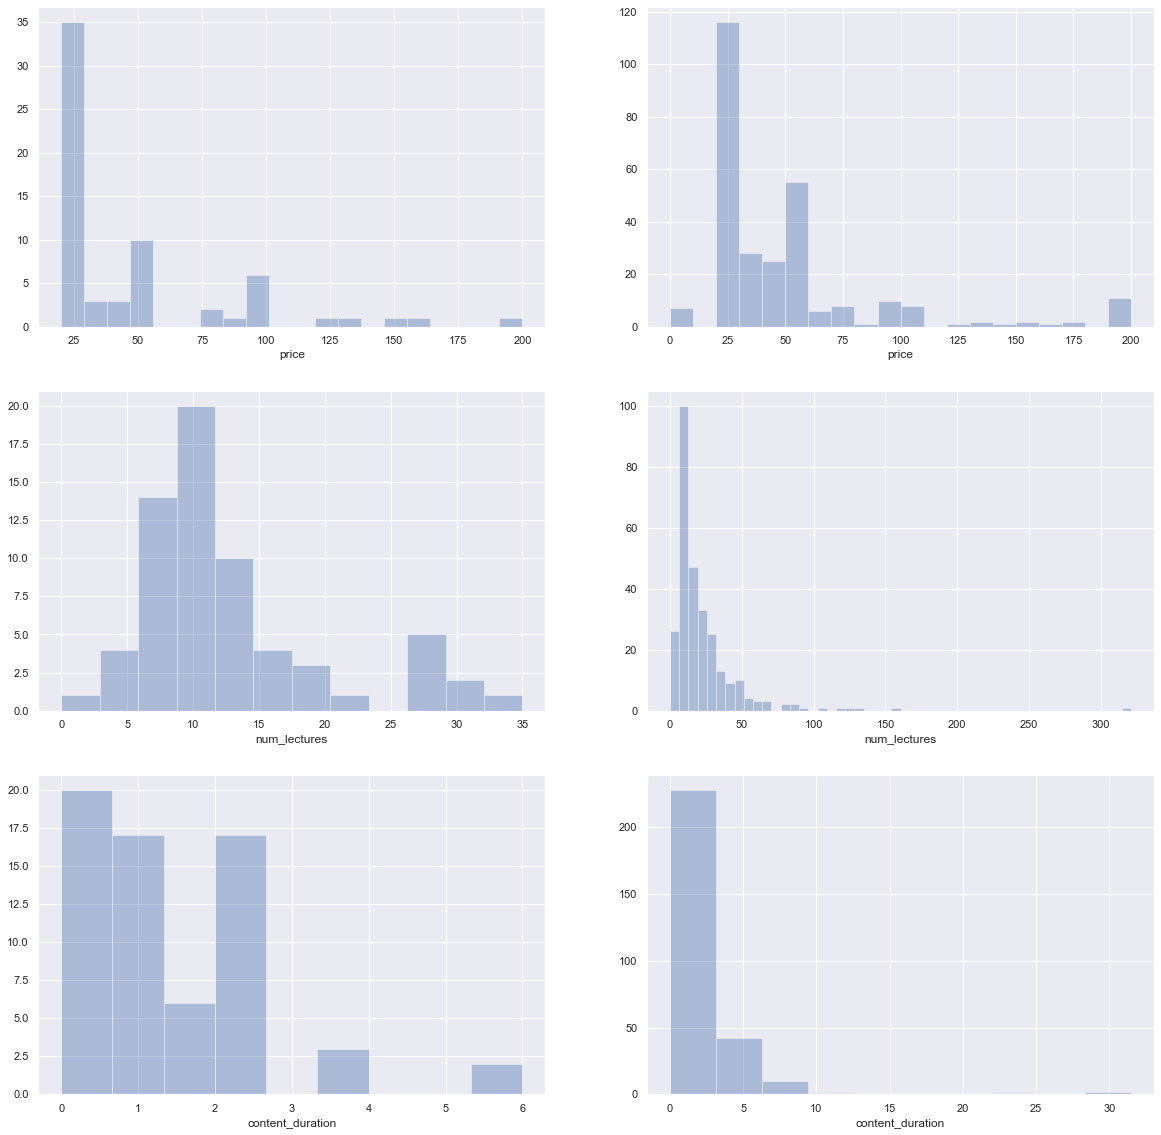

In [260]:
f, ax2 = plt.subplots(3, 2, figsize = (20, 20))
sns.distplot(udemy_DF_no_subs['price'], ax = ax2[0,0], kde = False, bins = 20)
sns.distplot(udemy_DF_no_revs['price'], ax = ax2[0,1], kde = False, bins = 20)
sns.distplot(udemy_DF_no_subs['num_lectures'], ax = ax2[1,0], kde = False)
sns.distplot(udemy_DF_no_revs['num_lectures'], ax = ax2[1,1], kde = False)
sns.distplot(udemy_DF_no_subs['content_duration'], ax = ax2[2,0], kde = False)
sns.distplot(udemy_DF_no_revs['content_duration'], ax = ax2[2,1], kde = False, bins = 10)
plt.show()

In [ ]:
All the graphs are right-skewed.
Most of the prices for unsubscribed and unreviewed courses lie between 0 to 50 dollars. The maximum in both cases are 200 dollars.
Unsubscribed courses majorly have around 10 lectures, with 35 being the maximum. Unreviewed courses majorly have between 0 and 50 lectures, with the highest number of lectures being 321. Both courses have a minimum of 5 lectures.
The longest amount of content for unsubscribed courses is 6 hours, whereas it is 31.5 hours for unreviewed courses. Majority of unsubscribed courses have content duration of almost 1 hour, while majority of unreviewed courses are approximately between 0.5 to 3 hours.

In [ ]:
We can see that paid courses have a higher duration, with an average of 2.5 hours, whereas free courses have a median of 1.5 hours. It is also worth noting that duration varies considerabily more on paid courses as well.`

In [ ]:
       x='content_duration',
       y='is_paid',
       orientation='h',
       color='is_paid',
       title='Duration Distribution Across Type of Course',
       color_discrete_sequence=['#03cffc','#eb03fc']
      )


fig.update_layout(showlegend=False)
fig.update_xaxes(title='Content Duration')
fig.update_yaxes(title='Paid Course')
fig.show()
0
20
40
60
80
False
True


In [ ]:
Reviews/subscribers - engagement
There are 69 courses with 0 subscribers and 288 courses with 0 reviews. This means that there are 219 unreviewed courses that have more than 0 subscribers.